In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [5]:
core_df = pd.read_csv('.\Collect\score_college_exam_data\score_college_exam_data.csv', index_col= "Unnamed: 0")
core_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


# Câu hỏi: Phân tích tỉ lệ đậu tốt nghiệp của các tỉnh trên cả nước (chỉ dựa trên điểm thi THPT)

Hiện nay, có rất nhiều ý kiến về việc bỏ kì thi THPT để tránh trình trạng mưa điểm '10', 30 điểm vẫn trượt đại học,... việc xét tuyển tốt nghiệp cho học sinh sẽ do nhà trường đánh giá. Các trường đại học nên tổ chức một kỳ thi riêng để tiếp cận những thí sinh có nguyện vọng đăng ký. Không ít ý kiến cho rằng kỳ thi mang tầm quốc gia chỉ còn tính hình thức vì tỉ lệ đậu tốt nghiệp năm nào cũng cao ngất ngưởng.

Để tìm ra giải pháp cho các ý kiến trên, ta nên thống kê xem tỉ lệ đậu tốt nghiệp THPT 2 năm gần đây (2021-2022) như thế nào với điểm chỉ của kì thi tốt nghiệp THPT? Nó có tác động nào đến tỉ lệ tốt nghiệp không (Nếu tỉ lệ gần như quá cao thì có vẻ kì thi này không có tác động mấy đến việc xét tốt nghiệp nhỉ???). Ở các tỉnh thì điều kiện học tập khác nhau nên tỉ lệ tốt nghiệp cũng sẽ khác nhau. Do đó để có thể điều chỉnh kì thi cho phù hợp thì ta nên thống kê tỉ lệ đậu tốt nghiệp qua từng tỉnh. Nhằm tìm ra những giải pháp phù hợp cho kì thi này.



Đọc mã tỉnh và tên tỉnh lưu vào `Matinh`

In [6]:
f = open('.\PhanTichVaTloiCauHoi\Matinh.txt', "r", encoding="utf-8")
f = f.read()
f = f.replace('\n','')
f = f.replace('– T',' - T')
f = f.split("Mã tỉnh: ")
Matinh = {}
f.remove('')
for i in f:
    i = i.split(" - ")
    Matinh[int(i[0].replace(' ',''))] = i[1]

# Phân tích và trả lời câu hỏi trên

Viết hàm tính tỉ lệ tốt nghiệp theo các tỉnh theo năm. Đầu tiên, ta sẽ chia điểm theo Chương trình Chính quy và Chương trình Giáo dục thường xuyên (ta bỏ qua những thí sinh tự do). Sau đó tính tỉ lệ tốt nghiệp theo công thức ở dưới.

Điểm đủ điều kiện tốt nghiệp với:
- Chương trình chính quy là tổng trung bình cộng 4 bài thi (Toán, Văn, Anh và 1 tổ hợp bài thi tự chọn) lớn hơn hoặc bằng 5 (ở đây để có cái nhìn chủ yếu tập chung vào bài thi THPT nên mình sẽ không xét điểm cộng ưu tiên).
- Chương trình GDTX là tổng trung bình cộng 3 bài thi (Toán, Văn và 1 tổ hợp bài thi tự chọn) lớn hơn hoặc bằng 5 (ở đây để có cái nhìn chủ yếu tập chung vào bài thi THPT nên mình sẽ không xét điểm cộng ưu tiên).

In [8]:
def TotNghiepTheoNam(Year):
    core_df_year = core_df[(core_df['Year'] == Year)]
    core_df_year_CQ = core_df_year.dropna(thresh=8)
    core_df_year_GDTX = core_df_year[(np.isnan(core_df_year['Ngoai_ngu']))].drop('Ngoai_ngu', axis= 1)
    core_df_year_GDTX = core_df_year_GDTX.dropna(thresh=7)
    TileDauTotNghiep = {}
    for i in Matinh.keys():
        TileDauTotNghiep[Matinh[i]] = len(core_df_year_CQ[((((core_df_year_CQ["Toan"] + core_df_year_CQ["Van"] + core_df_year_CQ["Ngoai_ngu"] + 
                                        (core_df_year_CQ["Li"] + core_df_year_CQ["Hoa"] + core_df_year_CQ["Sinh"])/3)/4) >=5) 
                                        & (int(i) == core_df_year_CQ["sbd"] // 1000000))])

        TileDauTotNghiep[Matinh[i]] += len(core_df_year_CQ[(((core_df_year_CQ["Toan"] + core_df_year_CQ["Van"] + core_df_year_CQ["Ngoai_ngu"] + 
                                        (core_df_year_CQ["Dia"] + core_df_year_CQ["Su"] + core_df_year_CQ["GDCD"])/3)/4) >=5) 
                                        & (int(i) == core_df_year_CQ["sbd"] // 1000000)])

        TileDauTotNghiep[Matinh[i]] += len(core_df_year_GDTX[((((core_df_year_GDTX["Toan"] + core_df_year_GDTX["Van"] + 
                                        (core_df_year_GDTX["Li"] + core_df_year_GDTX["Hoa"] + core_df_year_GDTX["Sinh"])/3)/3) >=5) 
                                        & (int(i) == core_df_year_GDTX["sbd"] // 1000000))])

        TileDauTotNghiep[Matinh[i]] += len(core_df_year_GDTX[((((core_df_year_GDTX["Toan"] + core_df_year_GDTX["Van"] + 
                                        (core_df_year_GDTX["Dia"] + core_df_year_GDTX["Su"] + core_df_year_GDTX["GDCD"])/3)/3) >=5) 
                                        & (int(i) == core_df_year_GDTX["sbd"] // 1000000))])
        if (TileDauTotNghiep[Matinh[i]]!=0):
            TileDauTotNghiep[Matinh[i]] /= len(core_df_year_CQ[(int(i) == core_df_year_CQ["sbd"] // 1000000)])+len(core_df_year_GDTX[(int(i) == core_df_year_GDTX["sbd"] // 1000000)])
    return TileDauTotNghiep

Ta sẽ tính tỉ lệ tốt nghiệp của năm 2021 và 2022. Sau đó trực quan hoá để dễ quan sát và có những nhận định giữa trên dữ liệu.

In [9]:
TK_2021 = TotNghiepTheoNam(2021)
TK_2022 = TotNghiepTheoNam(2022)

Text(0.5, 1.0, 'Thống kê tỉ lệ đậu tốt nghiệp theo điểm THPT năm 2021 và 2022')

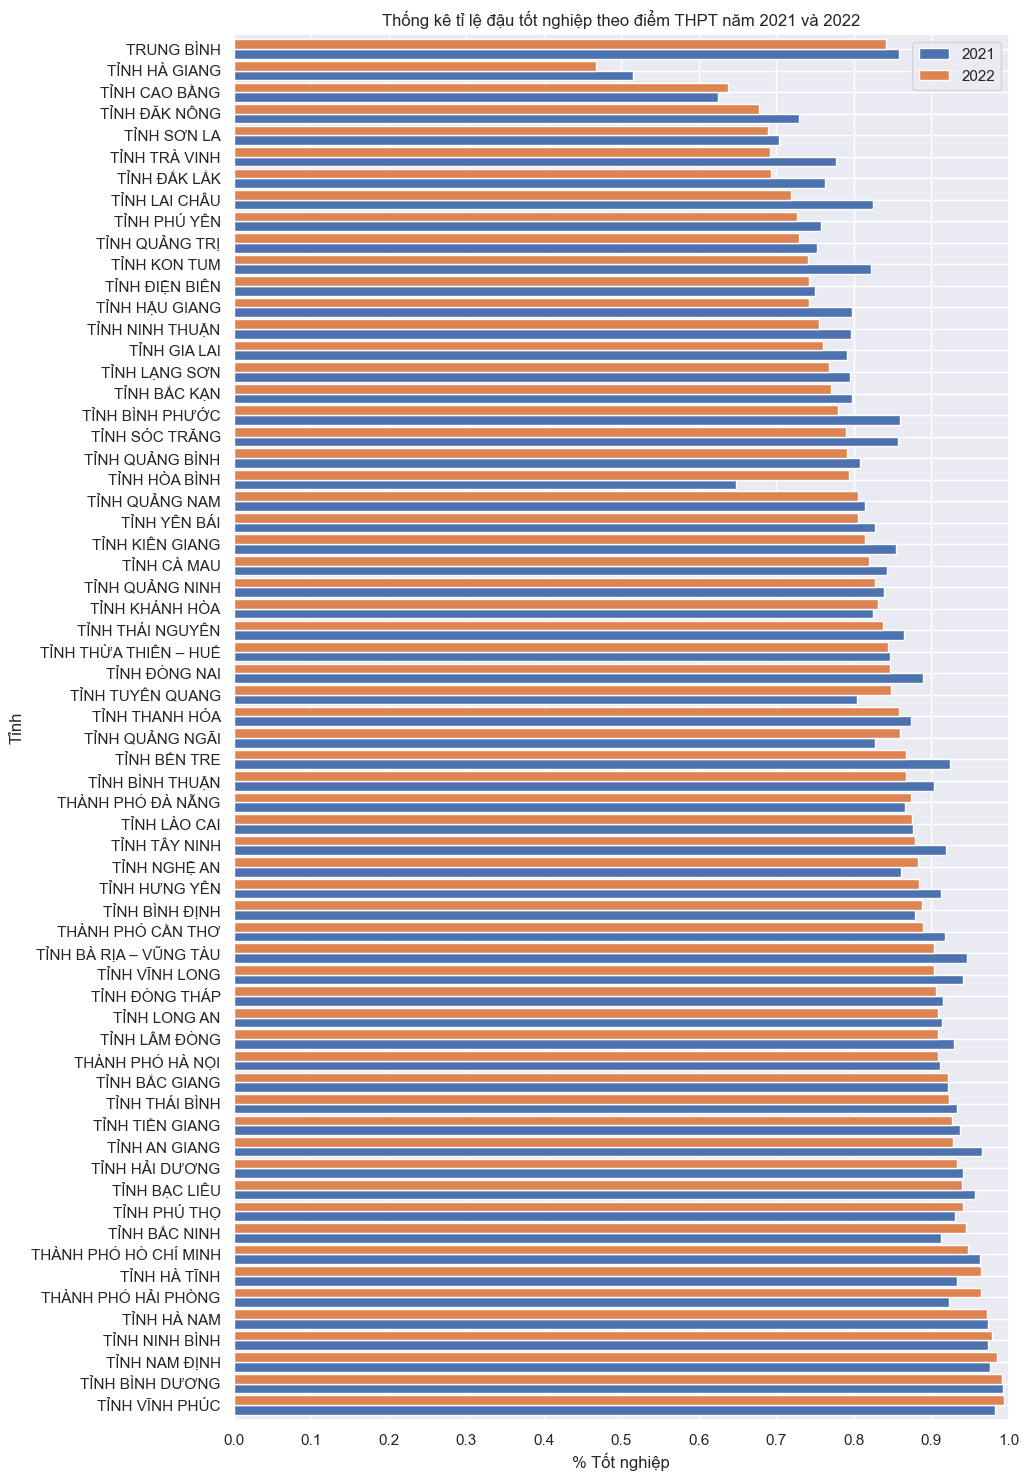

In [41]:
TK_21_22 = []
for i in TK_2021.keys():
    TK_21_22.append([i,TK_2021[i],TK_2022[i]])
TK_21_22 = pd.DataFrame(TK_21_22, columns= ['Tỉnh', 2021, 2022])
TK_21_22 = TK_21_22.sort_values(2022, ascending= False)
TK_21_22.loc[len(TK_21_22.index)] = ["TRUNG BÌNH", sum(list(TK_2021.values()))/len(TK_2021.keys()), sum(list(TK_2022.values()))/len(TK_2022.keys())]
TK_21_22 = TK_21_22.set_index("Tỉnh")
TK_21_22.plot.barh(figsize = (10,18), width = 0.9)
plt.xticks(np.arange(0, 1.05, step = 0.1))
plt.xlim(0,1)
plt.xlabel('% Tốt nghiệp')
plt.title("Thống kê tỉ lệ đậu tốt nghiệp theo điểm THPT năm 2021 và 2022")


Qua biểu đồ trên ta thấy:

- Tỉ lệ đậu tốt nghiệp theo điểm thi THPT của các tỉnh qua 2 năm có sự chêch lệch. Năm 2022 tỉ lệ tốt nghiệp thấp hơn năm 2021. Nguyên nhân năm 2022 đề thi THPT có vẻ khó hơn nhưng sự chêch lệch này không đáng kể. Điều này cho thấy có vẻ đề thi 2 năm gần đây (2021 - 2022) khá là ổn định.

- Thực tế, tỷ lệ học sinh được công nhận tốt nghiệp THPT năm 2022 trên cả nước là 98,57%. Nhưng tỉ lệ học sinh tốt nghiệp nếu tính theo điểm thi THPT chỉ là 85%. Sự chêch lệch trên là quá lớn. Sự chêch lệch này nguyên nhân phần lớn là do điểm 3 năm THPT, các điểm cộng khác đã tác động rất lớn đến tỉ lệ tốt nghiệp của học sinh THPT. Có lẻ những ý kiến loại bỏ kì thi tốt nghiệp THPT vì nó thực sự không mang lại nhiều ý nghĩa cho việc xét tốt nghiệp cũng là một ý tưởng khá hợp lý.

- Tỉ lệ đậu tốt nghiệp ở các tỉnh có sự chêch lệch rất lớn giữa các tỉnh đặc biệt tỉnh Vĩnh Phúc (tỉ lệ tốt nghiệp năm 2022 cao nhất) và tỉnh Hà Giang (tỉ lệ tốt nghiệp thấp nhất năm 2022). Sự chêch lệch này bị ảnh hương bởi nhiều tố như điều kiện học tập, truyền thống học tập,... Vì thế, chúng ta nên tập chung nâng cao tinh thần và điều kiện học tập cho các tỉnh mà tình hình học tập còn thấp so với các tỉnh khác trên cả nước. Ý kiến là chuyển việc xét tốt nghiệp của học sinh cho các tỉnh để tự tính toán cân nhắc nhằm đưa ra các hình thức phù hợp cho học sinh trong tỉnh cũng là một ý tưởng đáng được xem xét.